In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

## Load the data.

Load and split dataset in test and training dataset

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
np.max(X_train), np.min(X_train), np.mean(X_train)

(255, 0, 72.94035223214286)

In [8]:
np.max(X_test), np.min(X_test), np.mean(X_test)

(255, 0, 73.14656658163265)

## Defining MNIST dataset category.

In [9]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat',
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]

## Data Exploration

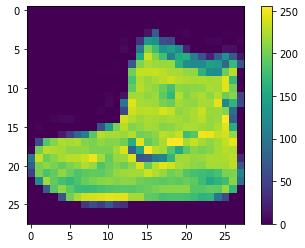

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

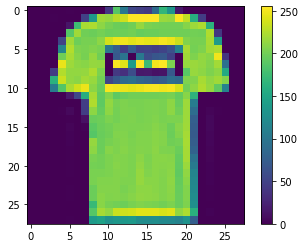

In [11]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

Since the Neural Network takes values between 0 and 1. We need to bring or training data between 0 and 1. To do that we will divide all our training and test data by the max value of the training/test as found above "np.max(X_train)"

In [12]:
X_train = X_train/np.max(X_train) # 255 is the max value of the training data. nm

In [13]:
X_test = X_test/np.max(X_train)

Now we can see below that we have brought our data between 0 and 1. Look at the bar.

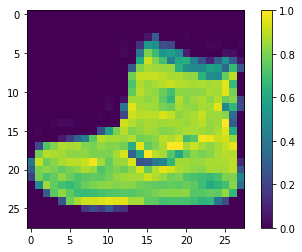

In [14]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

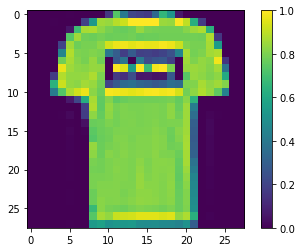

In [15]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

## Build the model with Tensorflow 2.0

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

#### Sequential Model
The most common type of model is the Sequential model, which is a linear stack of layers. You can create a Sequential model by passing a list of layers to the sequential() function

In [17]:
model = Sequential()

# Flatten just converts the data into a single dimension. 28 x 28 is what we have in out training data. 
# As you can see above. It will convert 28 x 28 in to a single dimension, which is 784

# Input Layer. Input all data.
model.add(Flatten(input_shape = (28, 28))) # 28 x 28 = 784

# Hidden layer.
model.add(Dense(128, activation= "relu")) # 128 is no of layers. (784 + 1) x 128 = 100480

# Output Layer. Ouput no of layers is expected different outcome -1. Here it is 11 - 1 = 10
model.add(Dense(10, activation= "softmax")) # (128 + 1) x 10 = 1290. 

# Total
# 100480 + 1290 = 101770


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compile Model
Few important things for compiling the model:
1) Define Loss Function - Minimizes the error during the training

2) Optimizer - Optimizes the model

3) Metrices - Generate information

In [19]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

## Training the model

In [20]:
# epoch - No of times it will train the dataset on this model.
# validation_split - Only given percent will be used for validation accuracy and validation loss.
history = model.fit(X_train, Y_train, epochs = 10, batch_size=10, validation_split=0.2) 

# history is used below to plot learning curve and confusion matrix

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 39s 804us/sample - loss: 0.5030 - accuracy: 0.8219 - val_loss: 0.4051 - val_accuracy: 0.8493
Epoch 2/10
48000/48000 [==============================] - 33s 687us/sample - loss: 0.3783 - accuracy: 0.8618 - val_loss: 0.4132 - val_accuracy: 0.8528
Epoch 3/10
48000/48000 [==============================] - 35s 728us/sample - loss: 0.3406 - accuracy: 0.8737 - val_loss: 0.3712 - val_accuracy: 0.8665
Epoch 4/10
48000/48000 [==============================] - 34s 707us/sample - loss: 0.3157 - accuracy: 0.8839 - val_loss: 0.3349 - val_accuracy: 0.8800
Epoch 5/10
48000/48000 [==============================] - 37s 764us/sample - loss: 0.2962 - accuracy: 0.8917 - val_loss: 0.3332 - val_accuracy: 0.8803
Epoch 6/10
48000/48000 [==============================] - 33s 678us/sample - loss: 0.2845 - accuracy: 0.8940 - val_loss: 0.3470 - val_accuracy: 0.8769
Epoch 7/10
48000/48000 [====================

## Evaluate the accuracy

Here we will see that the accuracy of the model during training was 0.9109, above, but it was less during the testing, below. This shows the overfitting of the model.

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_loss)
print(test_accuracy)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

77.82271078763888
0.8402


## Making Predictions

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# Predicting Y value on our test data
Y_predict = model.predict_classes(X_test)

In [24]:
accuracy_score(Y_test, Y_predict)

0.8402

In [25]:
pred = model.predict(X_test)

In [26]:
pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [28]:
np.argmax(pred[0])

9

In [29]:
np.argmax(pred[1])

2

## Plotting Learning Curve

Install mlxtend using 
- conda install --name tensorflow20 -c conda-forge mlxtend

In [30]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [31]:
history.history

{'loss': [0.5030251468108812,
  0.3783192892240186,
  0.3405871484111049,
  0.3156980361654132,
  0.2961941412348945,
  0.28450205281534485,
  0.271860897659717,
  0.25944087693442874,
  0.25013152608139233,
  0.24253358951429316],
 'accuracy': [0.8219375,
  0.86175,
  0.8736875,
  0.88385415,
  0.89166665,
  0.8939792,
  0.8985625,
  0.9018958,
  0.9059167,
  0.90870833],
 'val_loss': [0.4051070732122753,
  0.4131703360735749,
  0.37123677690397017,
  0.33491115308153285,
  0.33318287299907146,
  0.34697708988601034,
  0.35065579075817366,
  0.3382924135357219,
  0.36884474399795486,
  0.33609002250945197],
 'val_accuracy': [0.84933335,
  0.85275,
  0.8665,
  0.88,
  0.8803333,
  0.87691665,
  0.8754167,
  0.8785833,
  0.878,
  0.881]}

In [32]:
import matplotlib.pyplot as plt

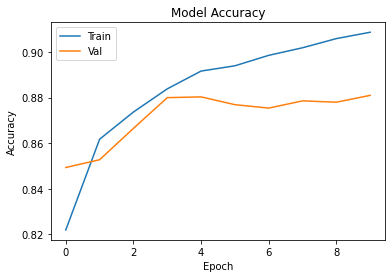

In [33]:
# Plot training and validation accuracy values
# Train vs Test
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

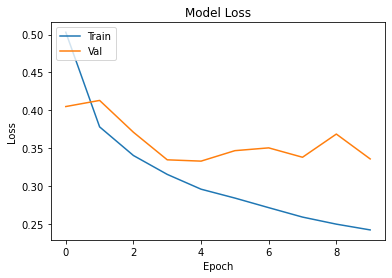

In [34]:
# Plot training and validation loss values
# Train vs Test
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

## Confusion Matrix

In [35]:
# !pip install mlxtend

In [36]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

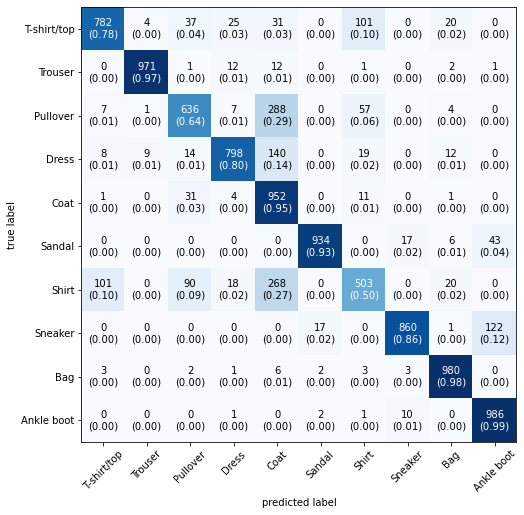

In [37]:
mat = confusion_matrix(Y_test, Y_predict)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), class_names=class_names, show_normed=True)